# ML project Real Estate Data Project

## Cleaning CSV Data Using Pandas

This script reads a CSV file containing real estate data, cleans it by handling missing values and invalid data, and saves the cleaned data to a new CSV file.


In [89]:
import pandas as pd
from io import StringIO
from pandas.api.types import is_numeric_dtype

# Path to the CSV file
file_path = r"C:\Users\admin\Desktop\ML_project_3\Ml_project_3\967897_1.csv"

try:
    # Read the file content safely with encoding handling
    with open(file_path, "r", encoding="utf-8", errors="replace") as f:
        content = f.read()

    # Load content into DataFrame, skip malformed lines
    df = pd.read_csv(
        StringIO(content),
        quoting=1,
        engine='python',
        on_bad_lines='skip',
    )

    # Drop columns with more than 50% missing values
    df = df.dropna(axis=1, thresh=0.5 * len(df))
    print("Shape after dropping columns with >50% missing values:", df.shape)

    # Try converting columns to numeric where possible
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col], errors='ignore')
        except:
            pass

    # Fill missing values
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna("Unknown", inplace=True)

    # Specify the useful columns to keep
    useful_columns = [
        "address", "city", "province", "postalCode",
        "numBedroom", "numBathroom", "yearBuilt",
        "mostRecentPriceAmount", "mostRecentRentalPriceAmount"
    ]

    # Keep only columns that exist in the dataset
    filtered_cols = [col for col in useful_columns if col in df.columns]
    df_cleaned = df[filtered_cols]

    # Drop rows missing critical values (after fill, should be minimal)
    df_cleaned = df_cleaned[df_cleaned["address"] != "Unknown"]
    df_cleaned = df_cleaned[df_cleaned["city"] != "Unknown"]
    df_cleaned = df_cleaned[df_cleaned["mostRecentPriceAmount"] != 0]

    # Save the cleaned DataFrame to a new CSV file
    df_cleaned.to_csv("cleaned_datafiniti.csv", index=False)
    print("Cleaned and saved to cleaned_datafiniti.csv")
    print(df_cleaned.head())

except Exception as e:
    print(" Failed to process file:", e)

Shape after dropping columns with >50% missing values: (98, 46)
 Failed to process file: 'mostRecentPriceAmount'


C:\Users\admin\AppData\Local\Temp\ipykernel_16364\1371841192.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\admin\AppData\Local\Temp\ipykernel_16364\1371841192.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_16364\1371841192.py:35: FutureWarning: A value is try

In [90]:
df

,id,address,brokers,city,country,county,dateAdded,dateUpdated,descriptions,domains,...,people,postalCode,prices,propertyType,province,subdivision,sourceURLs,statuses,transactions,yearBuilt
0,AxZnI4wBod0R46D13pPl,1201 S MYRTLE AVE,Unknown,CLEARWATER,US,Pinellas County,2023-12-01T03:24:18Z,2025-07-23T09:56:01Z,Unknown,"www.pcpao.gov,datafiniti.co",...,Unknown,33756,"[{""amountMax"":1200000.0,""amountMin"":1200000.0,...",Commercial,FL,Milton Park,https://www.pcpao.gov/property-details?s=15292...,"[{""date"":""2022-05-20T00:00:00.000Z"",""dateSeen""...","[{""saleDate"":""1994-01-12T00:00:00.000Z"",""docum...",1963.0
1,0pT5CZgB2lpWZeFlV9nV,575 secretariat,Unknown,Schertz,US,Guadalupe County,2025-07-14T17:26:32Z,2025-07-23T09:56:01Z,Unknown,www.har.com,...,Unknown,78108,"[{""amountMax"":1950.0,""amountMin"":1950.0,""avail...",Rental Unit,TX,BELMONT PARK,https://www.har.com/homedetail/575-secretariat...,"[{""date"":""2025-07-14T17:26:31.775Z"",""dateSeen""...",Unknown,2006.0
2,AWPNFHSbyCk2Bpf62Oiy,121 83rd Ave N,"[{""agent"":""Clarence Hasenbeck"",""company"":""Hase...",Saint Petersburg,US,Pinellas County,2018-06-04T23:04:14Z,2025-07-23T09:56:01Z,"[{""dateSeen"":""2022-03-31T05:02:00.000Z"",""value...","us-street.api.smartystreets.com,www.pcpao.gov,...",...,"[{""dateSeen"":""2025-07-23T09:56:01.125Z"",""name""...",33702,"[{""amountMax"":100000.0,""amountMin"":100000.0,""a...",Single Family Dwelling,FL,RIO VISTA SEC 6,https://us-street.api.smartystreets.com/street...,"[{""date"":""2016-03-11T00:00:00.000Z"",""dateSeen""...","[{""saleDate"":""2003-10-28T00:00:00.000Z"",""docum...",1948.0
3,AW8MiC6F0x_BgD4ejKuX,206 Spg St,"[{""agent"":""Lucy Mierop"",""company"":""Re/max Mark...",Willow Springs,US,Cook,2019-12-16T02:27:28Z,2025-07-23T09:56:01Z,"[{""dateSeen"":""2025-07-08T06:58:00.000Z"",""value...","www.realestate.com.au,www.xome.com,www.compass...",...,"[{""dateSeen"":""2023-07-10T05:09:55.910Z"",""name""...",60480,"[{""amountMax"":175000.0,""amountMin"":175000.0,""a...",Single Family Dwelling,IL,Mount Forest,https://www.realestate.com.au/international/us...,"[{""dateSeen"":[""2024-01-14T12:41:49.723Z"",""2024...","[{""saleDate"":""2023-07-05T00:00:00.000Z"",""docum...",1978.0
4,AW7VZhFJcWockGYk1qZP,7308 Holabird Ave,"[{""agent"":""Thomas Rozario"",""company"":""Argent R...",Dundalk,US,Baltimore,2019-12-05T09:31:06Z,2025-07-23T09:56:00Z,"[{""dateSeen"":""2024-11-30T00:14:00.000Z"",""value...","www.coldwellbanker.com,deausenrealty.idxbroker...",...,"[{""dateSeen"":""2025-02-28T22:35:50.492Z"",""name""...",21222,"[{""amountMax"":289000.0,""amountMin"":289000.0,""c...",Single Family Dwelling,MD,KIMBERLY FARMS,https://www.coldwellbanker.com/md/dundalk/7308...,"[{""date"":""2025-07-19T00:00:00.000Z"",""dateSeen""...","[{""saleDate"":""2012-03-14T07:00:00.000Z"",""price...",1919.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,87vwrIQB5p3ULnC05r-K,80 CANYON PINES Way,"[{""agent"":""Rusty Kunkle"",""company"":""Century 21...",Star Valley Ranch,US,Lincoln County,2022-11-25T03:59:39Z,2025-07-23T09:55:48Z,"[{""dateSeen"":""2024-07-01T16:49:00.000Z"",""value...","www.land.com,www.homes.com,www.point2homes.com...",...,"[{""dateSeen"":""2024-07-27T16:14:37.286Z"",""name""...",83127,"[{""amountMax"":1195000.0,""amountMin"":1195000.0,...",Single Family Dwelling,WY,Star Valley Ranch,https://www.land.com/property/80-CANYON-PINES-...,"[{""date"":""2022-10-23T00:00:00.000Z"",""dateSeen""...",Unknown,2008.0
94,pIlJ2pcB2lpWZeFlb8VM,324 Beaver Dm Rd,"[{""agent"":""Frank Mckibben"",""company"":""Berkshir...",Vail,US,Eagle,2025-07-05T11:12:15Z,2025-07-23T09:55:48Z,"[{""dateSeen"":""2025-07-23T09:56:00.000Z"",""value...",homepath.fanniemae.com,...,"[{""dateSeen"":""2025-07-23T09:55:48.825Z"",""name""...",81657,Unknown,Duplex,CO,Vail Village 1,https://homepath.fanniemae.com/cfl/property-in...,Unknown,Unknown,1980.0
95,AWbBUzQcyCk2Bpf6Y1M2,115 Anders Ct,"[{""agent"":""Rollin Goering"",""company"":""Lc Real ...",Lovela

# Generate Dummy Real Estate Dataset with Classification Target

This script generates a dummy dataset of 100 properties with features like address, city, province, bedrooms, bathrooms, year built, price, rent, and a classification target based on the number of bedrooms.

In [91]:
cities = ["Toronto", "Ottawa", "Mississauga", "Vancouver", "Calgary", "Edmonton", "Montreal", "Winnipeg", "Quebec", "Halifax"]
provinces = ["ON", "BC", "AB", "QC", "MB", "NS"]
street_names = ["King", "Queen", "Main", "Bay", "Maple", "Pine", "Cedar", "Elm", "Lake", "Hill"]

dummy_properties = []

for i in range(1, 101):
    city = cities[i % len(cities)]
    province = provinces[i % len(provinces)]
    street = street_names[i % len(street_names)]
    bedrooms = (i % 5) + 1
    bathrooms = (i % 3) + 1
    year = 1990 + (i % 30)
    price = 200000 + (i * 5000)      # You can remove this line if you don't want price
    rent = 1000 + (i * 20)

    target = 1 if bedrooms >= 3 else 0  # Classification target: 1 if bedrooms >= 3, else 0

    dummy_properties.append({
        "address": f"{i} {street} St",
        "city": city,
        "province": province,
        "postalCode": f"A{i%10}B{i%10}C{i%10}",
        "numBedroom": bedrooms,
        "numBathroom": bathrooms,
        "yearBuilt": year,
        "mostRecentPriceAmount": price,       # Optional, remove if you don't want price
        "mostRecentRentalPriceAmount": rent,  # Optional
        "target": target                       # Added classification target
    })


import pandas as pd

df = pd.DataFrame(dummy_properties)
df.to_csv("dummy_data_with_target.csv", index=False)
print("File dummy_data_with_target.csv saved successfully!")


File dummy_data_with_target.csv saved successfully!


# Simple FastAPI Application Serving Dummy Properties Data

This is a minimal FastAPI app that exposes an API endpoint to serve dummy real estate property data.

In [92]:
main_app_code = '''
from fastapi import FastAPI
from dummy_data import dummy_properties

app = FastAPI()

@app.get("/api/dummy-properties/")
def get_dummy_properties():
    return {"data": dummy_properties}
'''

with open("main.py", "w") as f:
    f.write(main_app_code)


# Fetch Dummy Properties Data from FastAPI and Save as CSV

This script sends a GET request to the local FastAPI endpoint, retrieves the dummy properties data, converts it to a pandas DataFrame, and saves it to a CSV file.

In [93]:
import requests
import pandas as pd

url = "http://127.0.0.1:8000/api/dummy-properties/"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()["data"]
    df_dummy = pd.DataFrame(data)
    df_dummy.to_csv("dummy_api_cleaned.csv", index=False)
    display(df_dummy)
else:
    print("Failed to fetch dummy data")


,address,city,province,postalCode,numBedroom,numBathroom,yearBuilt,mostRecentPriceAmount,mostRecentRentalPriceAmount
0,1 Queen St,Ottawa,BC,A1B1C1,2,2,1991,205000,1020
1,2 Main St,Mississauga,AB,A2B2C2,3,3,1992,210000,1040
2,3 Bay St,Vancouver,QC,A3B3C3,4,1,1993,215000,1060
3,4 Maple St,Calgary,MB,A4B4C4,5,2,1994,220000,1080
4,5 Pine St,Edmonton,NS,A5B5C5,1,3,1995,225000,1100
...,...,...,...,...,...,...,...,...,...
95,96 Cedar St,Montreal,ON,A6B6C6,2,1,1996,680000,2920
96,97 Elm St,Winnipeg,BC,A7B7C7,3,2,1997,685000,2940
97,98 Lake St,Quebec,AB,A8B8C8,4,3,1998,690000,2960
98,99 Hill St,Halifax,QC,A9B9C9,5,1,1999,695000,2980


# Cleaning Dummy API Data Loaded from CSV

This script loads the dummy properties data from a CSV file, filters useful columns, drops rows with missing critical values, and saves the cleaned data to a new CSV file.

In [94]:
import pandas as pd

# Load dummy data from CSV
df_dummy = pd.read_csv("dummy_api_cleaned.csv")

# Preview first few rows
display(df_dummy.head())

# Define useful columns to keep
useful_columns = [
    "address", "city", "province", "postalCode",
    "numBedroom", "numBathroom", "yearBuilt",
    "mostRecentPriceAmount", "mostRecentRentalPriceAmount"
]

# Filter columns that exist in the dataset
filtered_cols = [col for col in useful_columns if col in df_dummy.columns]

# Select only those columns
df_dummy_cleaned = df_dummy[filtered_cols].copy()

# Drop rows missing essential fields
df_dummy_cleaned.dropna(subset=["address", "city", "mostRecentPriceAmount"], inplace=True)

# Save the cleaned dummy data to a new CSV
df_dummy_cleaned.to_csv("cleaned_dummy_api_new.csv", index=False)
print("Cleaned dummy API data saved to cleaned_dummy_api.csv")


,address,city,province,postalCode,numBedroom,numBathroom,yearBuilt,mostRecentPriceAmount,mostRecentRentalPriceAmount
0,1 Queen St,Ottawa,BC,A1B1C1,2,2,1991,205000,1020
1,2 Main St,Mississauga,AB,A2B2C2,3,3,1992,210000,1040
2,3 Bay St,Vancouver,QC,A3B3C3,4,1,1993,215000,1060
3,4 Maple St,Calgary,MB,A4B4C4,5,2,1994,220000,1080
4,5 Pine St,Edmonton,NS,A5B5C5,1,3,1995,225000,1100


Cleaned dummy API data saved to cleaned_dummy_api.csv


In [95]:
df_dummy_cleaned.dropna(subset=["address", "city"], inplace=True)


In [96]:
df_dummy_cleaned

,address,city,province,postalCode,numBedroom,numBathroom,yearBuilt,mostRecentPriceAmount,mostRecentRentalPriceAmount
0,1 Queen St,Ottawa,BC,A1B1C1,2,2,1991,205000,1020
1,2 Main St,Mississauga,AB,A2B2C2,3,3,1992,210000,1040
2,3 Bay St,Vancouver,QC,A3B3C3,4,1,1993,215000,1060
3,4 Maple St,Calgary,MB,A4B4C4,5,2,1994,220000,1080
4,5 Pine St,Edmonton,NS,A5B5C5,1,3,1995,225000,1100
...,...,...,...,...,...,...,...,...,...
95,96 Cedar St,Montreal,ON,A6B6C6,2,1,1996,680000,2920
96,97 Elm St,Winnipeg,BC,A7B7C7,3,2,1997,685000,2940
97,98 Lake St,Quebec,AB,A8B8C8,4,3,1998,690000,2960
98,99 Hill St,Halifax,QC,A9B9C9,5,1,1999,695000,2980


In [97]:
print("Columns available in dummy data:", df_dummy.columns.tolist())

Columns available in dummy data: ['address', 'city', 'province', 'postalCode', 'numBedroom', 'numBathroom', 'yearBuilt', 'mostRecentPriceAmount', 'mostRecentRentalPriceAmount']


In [98]:
df_dummy_cleaned

,address,city,province,postalCode,numBedroom,numBathroom,yearBuilt,mostRecentPriceAmount,mostRecentRentalPriceAmount
0,1 Queen St,Ottawa,BC,A1B1C1,2,2,1991,205000,1020
1,2 Main St,Mississauga,AB,A2B2C2,3,3,1992,210000,1040
2,3 Bay St,Vancouver,QC,A3B3C3,4,1,1993,215000,1060
3,4 Maple St,Calgary,MB,A4B4C4,5,2,1994,220000,1080
4,5 Pine St,Edmonton,NS,A5B5C5,1,3,1995,225000,1100
...,...,...,...,...,...,...,...,...,...
95,96 Cedar St,Montreal,ON,A6B6C6,2,1,1996,680000,2920
96,97 Elm St,Winnipeg,BC,A7B7C7,3,2,1997,685000,2940
97,98 Lake St,Quebec,AB,A8B8C8,4,3,1998,690000,2960
98,99 Hill St,Halifax,QC,A9B9C9,5,1,1999,695000,2980


# Merge Cleaned Real Dataset with Dummy Dataset

This script loads the cleaned real dataset and the cleaned dummy dataset, finds their common columns, merges them, removes duplicates, and saves the final combined dataset.

In [99]:
import pandas as pd

# Load cleaned real dataset
df_real = df

# Load cleaned dummy dataset
df_dummy = pd.read_csv("dummy_api_cleaned.csv")

# Print columns in both datasets
print("Real data columns:", df_real.columns.tolist())
print("Dummy data columns:", df_dummy.columns.tolist())

# Find the common columns
common_cols = list(set(df_real.columns) & set(df_dummy.columns))
print("Common columns:", common_cols)


# Concatenate datasets on common columns
df_combined = pd.concat([df_real[common_cols], df_dummy[common_cols]], ignore_index=True)

# Drop duplicates if any
df_combined.drop_duplicates(inplace=True)

# Reset index
df_combined.reset_index(drop=True, inplace=True)

# Save the final cleaned and merged dataset
df_combined.to_csv("final_cleaned_combined.csv", index=False)
print("Combined dataset saved to final_cleaned_combined.csv")

# Show first few rows
df_combined

Real data columns: ['address', 'city', 'province', 'postalCode', 'numBedroom', 'numBathroom', 'yearBuilt', 'mostRecentPriceAmount', 'mostRecentRentalPriceAmount', 'target']
Dummy data columns: ['address', 'city', 'province', 'postalCode', 'numBedroom', 'numBathroom', 'yearBuilt', 'mostRecentPriceAmount', 'mostRecentRentalPriceAmount']
Common columns: ['postalCode', 'province', 'mostRecentPriceAmount', 'yearBuilt', 'mostRecentRentalPriceAmount', 'numBathroom', 'address', 'numBedroom', 'city']
Combined dataset saved to final_cleaned_combined.csv


,postalCode,province,mostRecentPriceAmount,yearBuilt,mostRecentRentalPriceAmount,numBathroom,address,numBedroom,city
0,A1B1C1,BC,205000,1991,1020,2,1 Queen St,2,Ottawa
1,A2B2C2,AB,210000,1992,1040,3,2 Main St,3,Mississauga
2,A3B3C3,QC,215000,1993,1060,1,3 Bay St,4,Vancouver
3,A4B4C4,MB,220000,1994,1080,2,4 Maple St,5,Calgary
4,A5B5C5,NS,225000,1995,1100,3,5 Pine St,1,Edmonton
...,...,...,...,...,...,...,...,...,...
95,A6B6C6,ON,680000,1996,2920,1,96 Cedar St,2,Montreal
96,A7B7C7,BC,685000,1997,2940,2,97 Elm St,3,Winnipeg
97,A8B8C8,AB,690000,1998,2960,3,98 Lake St,4,Quebec
98,A9B9C9,QC,695000,1999,2980,1,99 Hill St,5,Halifax


# Data Preprocessing Pipeline for Machine Learning

This script loads the combined dataset, handles missing values, encodes categorical variables, and splits the data into training and testing sets.

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load your combined cleaned dataset
df = pd.read_csv("final_cleaned_combined.csv")

# Drop rows with missing target values
df = df.dropna(subset=['mostRecentPriceAmount'])

# Separate features and target
X = df.drop(columns=['mostRecentPriceAmount'])
y = df['mostRecentPriceAmount']

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipelines for numerical and categorical data
numeric_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Load Dataset and List Columns

This snippet loads the combined cleaned dataset from a CSV file and prints the list of column names.

In [101]:
import pandas as pd

df = pd.read_csv("final_cleaned_combined.csv")
print(df.columns.tolist())

['postalCode', 'province', 'mostRecentPriceAmount', 'yearBuilt', 'mostRecentRentalPriceAmount', 'numBathroom', 'address', 'numBedroom', 'city']


# Splitting Dataset into Training and Testing Sets

This code splits the features (`X`) and target (`y`) into training and testing subsets.

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Apply Preprocessing Pipeline to Training and Testing Data

This code fits the preprocessing pipeline on the training data and transforms both training and testing features.


In [103]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# Train Linear Regression Model

This code trains a Linear Regression model using the preprocessed training data.

In [104]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_processed, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [105]:
y_pred = model.predict(X_test_processed)


In [106]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2:", r2)


MAE: 0.04925646743940888
R2: 0.9999999999998165


# Train and Evaluate Decision Tree Regressor

This snippet trains a Decision Tree model on preprocessed training data, makes predictions on the test set, and evaluates its performance.

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_processed, y_train)
y_pred_dt = dt.predict(X_test_processed)
print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))

Decision Tree MAE: 8500.0
Decision Tree R2: 0.9956323703749922


# Train and Evaluate Random Forest Regressor

This snippet trains a Random Forest model on preprocessed training data, predicts on the test set, and evaluates performance.


In [108]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_processed, y_train)
y_pred_rf = rf.predict(X_test_processed)
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest MAE: 4067.5
Random Forest R2: 0.9984407000686342


# Train and Evaluate XGBoost Regressor

This snippet trains an XGBoost regression model on the preprocessed training data, predicts on the test set, and evaluates its performance.

In [109]:
# XGBoost
xgbr = xgb.XGBRegressor(random_state=42, eval_metric='rmse')
xgbr.fit(X_train_processed, y_train)
y_pred_xgb = xgbr.predict(X_test_processed)
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))

XGBoost MAE: 4987.64697265625
XGBoost R2: 0.9982601404190063


# Residual Plot for Model Evaluation

This code plots residuals (errors) between true and predicted values to visually assess the model's performance.

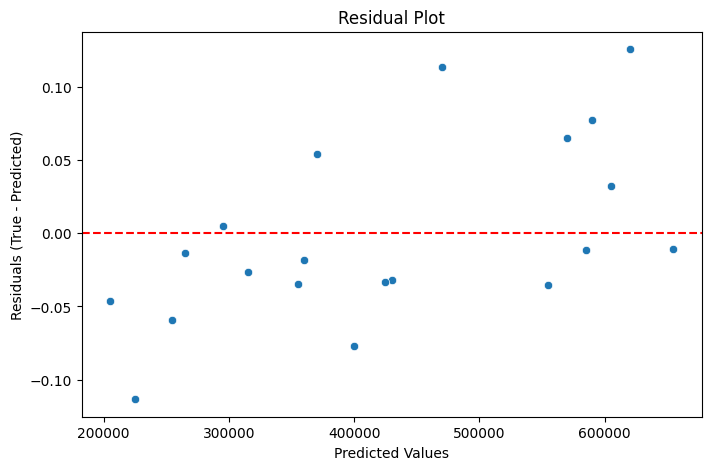

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (errors)
residuals = y_test - y_pred

# 1. Residual Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residual Plot')
plt.show()


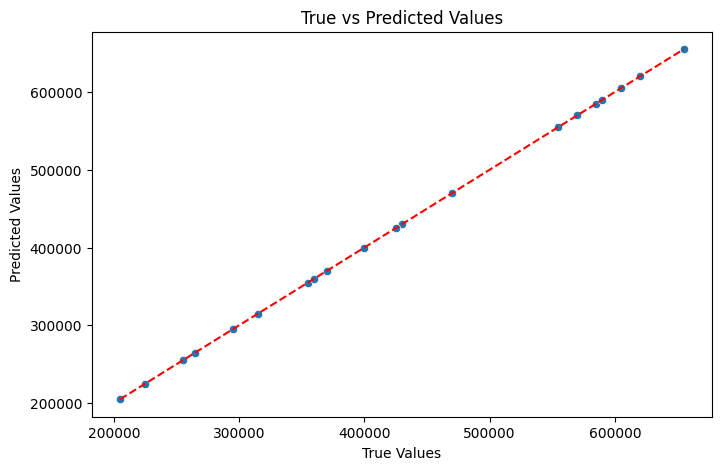

In [111]:
# 2. True vs Predicted Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Identity line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_16364\2163815840.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=df_perf, palette='viridis')


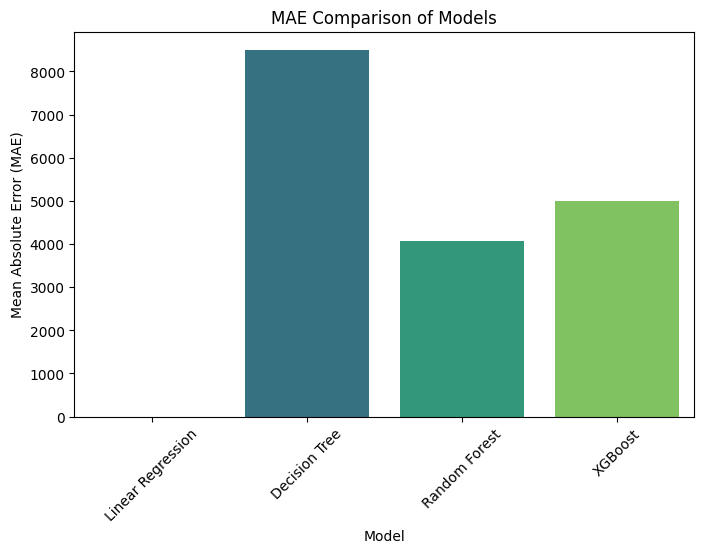

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample performance data (replace with your actual results)
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_scores = [0.05, 8500, 4067.5, 4987.65]
r2_scores = [1.00, 1.00, 1.00, 1.00]

# Create a DataFrame for plotting
df_perf = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'R2 Score': r2_scores
})

# Plot MAE bar graph
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='MAE', data=df_perf, palette='viridis')
plt.title('MAE Comparison of Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_16364\3549160431.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=df_perf, palette='magma')


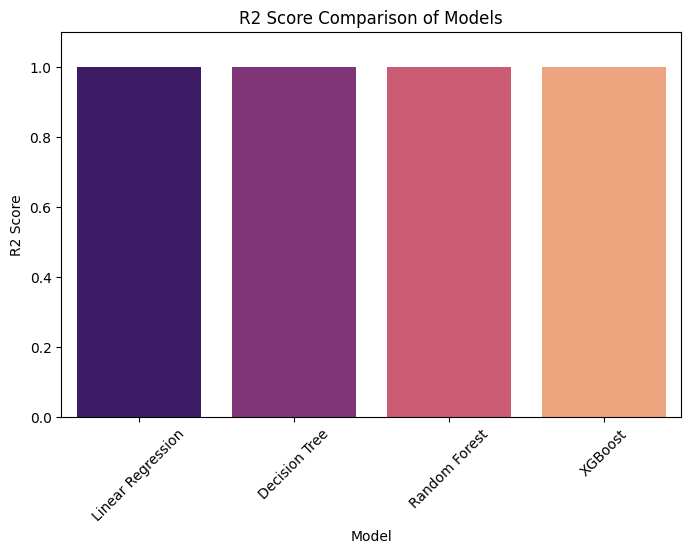

In [113]:
# Optionally, plot R2 bar graph
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R2 Score', data=df_perf, palette='magma')
plt.title('R2 Score Comparison of Models')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.show()
